Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


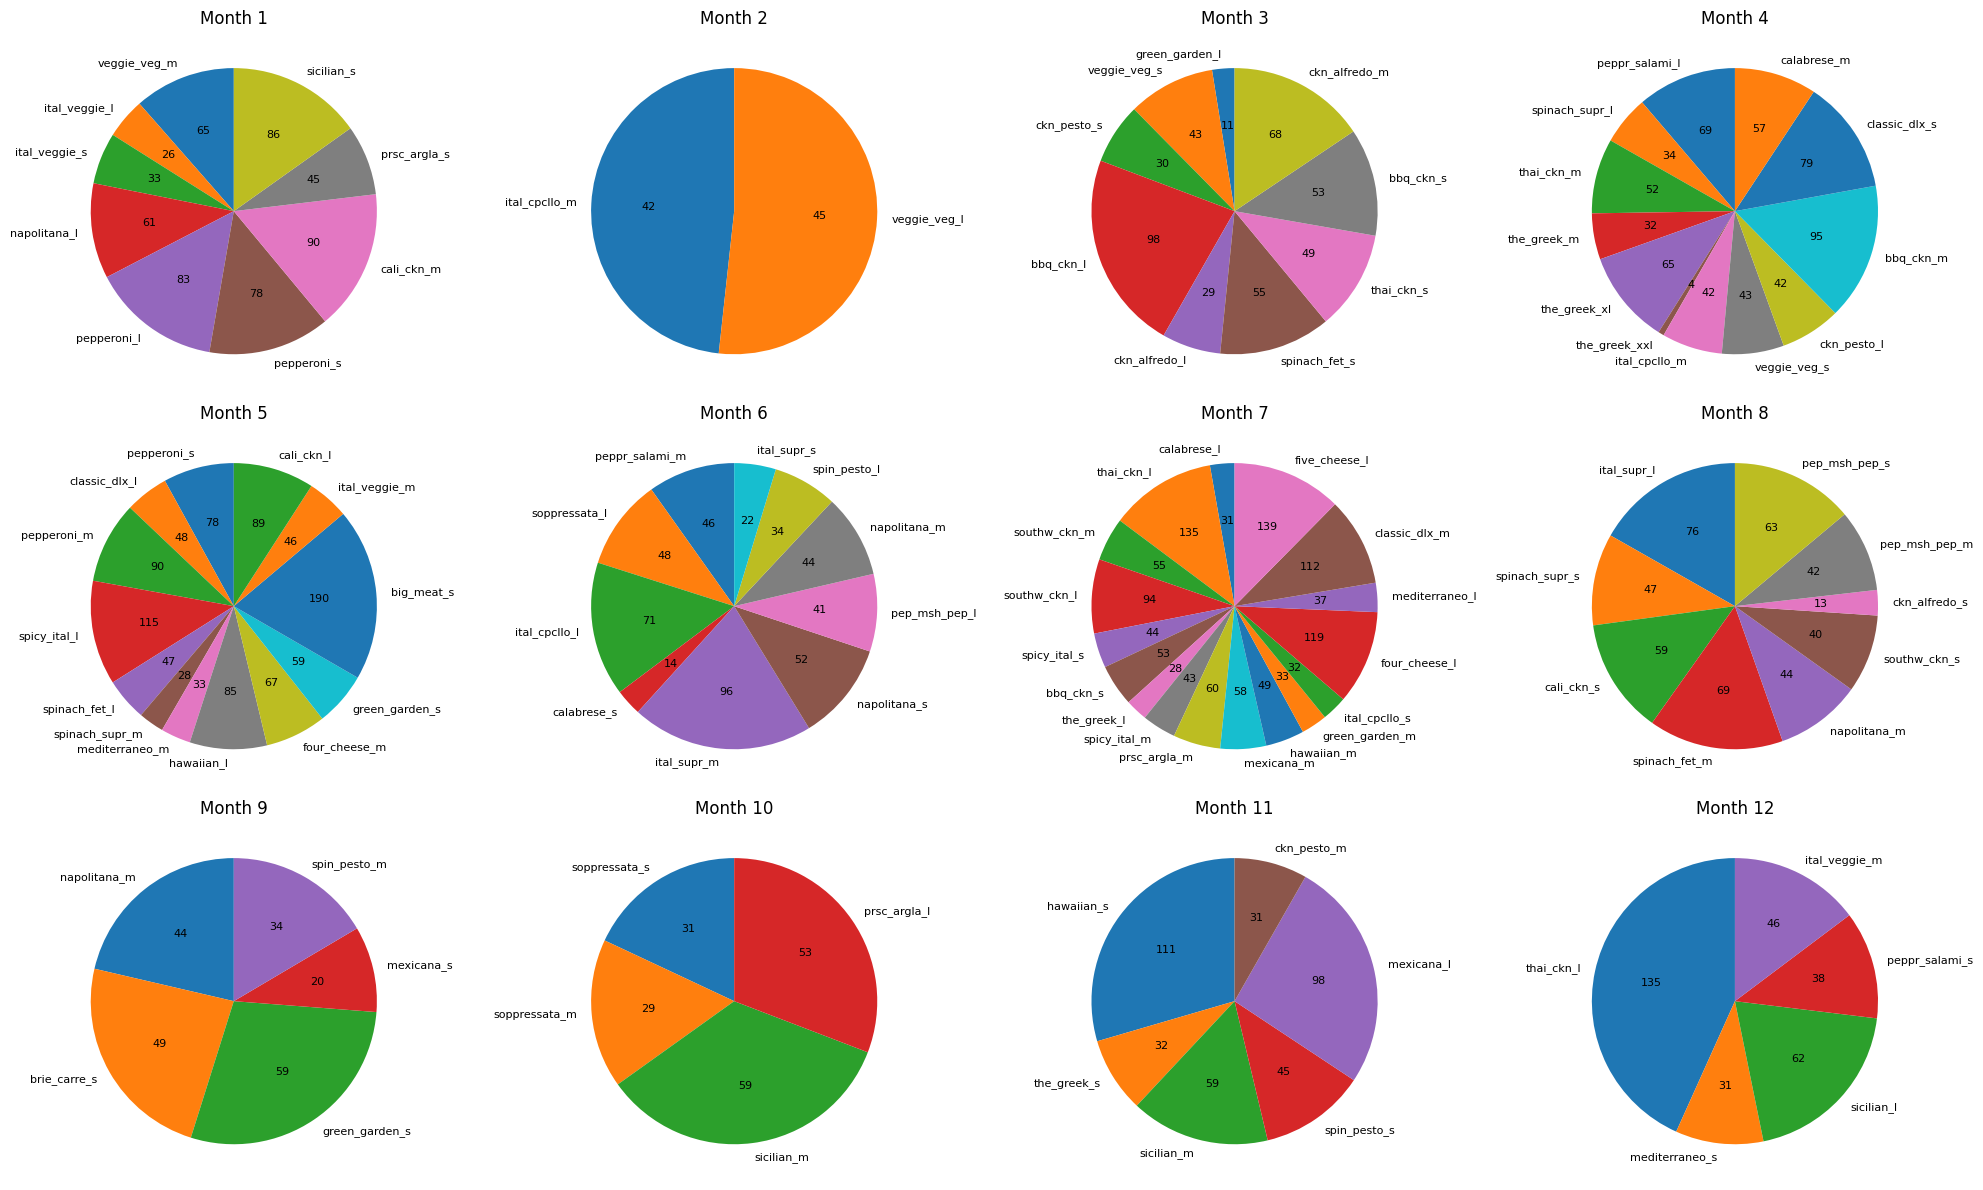

In [13]:
from google.colab import drive
import shutil
import pandas as pd
import matplotlib.pyplot as plt

# Mount google drive on google colab
drive.mount('/content/drive')

# Copy the CSV file from google drive to google colab
shutil.copy('/content/drive/MyDrive/University/5-Semester/Bases-de-Datos/Proyecto/Resultados/04_result.csv', '04_result.csv')

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('04_result.csv')

# Group by 'pizza_id' and find the maximum 'max_cantidad' for each type of pizza in each month
df_grouped = df.groupby(['pizza_id', 'mes'])['max_cantidad'].max().reset_index()

# Sort by month
df_grouped = df_grouped.sort_values(by='mes')

# Create a separate pie chart for each month
unique_months = df_grouped['mes'].unique()

# Create a figure with multiple subplots arranged in a 3x4 grid
num_rows = 3
num_cols = 4
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 12))

# Iterate through each month and plot the pie chart
for i, month in enumerate(unique_months):
    df_month = df_grouped[df_grouped['mes'] == month]
    quantities = df_month['max_cantidad']
    labels = df_month['pizza_id']
    ax = axes[i // num_cols, i % num_cols]
    wedges, texts, autotexts = ax.pie(quantities, labels=labels, startangle=90,
                                      autopct=lambda p: f'{int(round(p*sum(quantities)/100.))}')
    ax.set_aspect('equal')
    ax.set_title(f'Month {month}')

    # Adjust the fontsize of the pie chart labels
    for text in texts:
        text.set_fontsize(8)

    # Adjust the fontsize of the autopct labels (quantity and percentage)
    for autotext in autotexts:
        autotext.set_fontsize(8)

# Remove any empty subplots
for i in range(len(unique_months), num_rows * num_cols):
    axes.flat[i].axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()